In [1]:
import pandas as pd

# Adding Support for other europian encodings 
# Removing any rotten lines
# Making sure every colum is seperated with this "," coma idk
try:
    data_set = pd.read_csv('data-sell4all.csv', encoding='utf-8', delimiter=',', on_bad_lines='warn')
except UnicodeDecodeError:
    data_set = pd.read_csv('data-sell4all.csv', encoding='ISO-8859-1', delimiter=',', on_bad_lines='warn')

# Cleaning any unexpected characters
data_set.columns = [col.strip().replace(' ', '_').replace('’', '\'') for col in data_set.columns]
# making sure "Dépenses_des_clients" is only numeric by making any value thats not null
data_set['Dépenses_des_clients'] = pd.to_numeric(data_set['Dépenses_des_clients'], errors='coerce')
# Doing the same for age
data_set['Age'] = pd.to_numeric(data_set['Age'], errors='coerce')
# Removing Negative values
data_set.loc[data_set['Age'] < 0, 'Age'] = pd.NA
# Forcing age to be int
data_set['Age'] = data_set['Age'].astype('Int64')
# normalising gender to work with it
data_set['Genre'] = data_set['Genre'].str.strip().str.lower()
# Forcing gender to only be str
data_set['Genre'] = data_set['Genre'].astype(str) 
# Forcing gender to only be two values
valid_genders = ['male', 'female']
data_set = data_set[data_set['Genre'].isin(valid_genders)]
data_set['Genre'] = data_set['Genre'].astype('string')
# Forcing Nationality to be str
data_set['Pays'] = data_set['Pays'].astype('string')
# Handling null colons
data_set = data_set.dropna()


    
# Test display the first 5 rows
data_set.head()



,Pays,Age,Genre,Dépenses_des_clients
0,France,32,female,150.50
1,Germany,45,male,200.75
2,Spain,28,female,75.25
3,Italy,39,male,180.00
4,UK,52,female,250.30


In [2]:
# Calculating the median and mean or speding and age 
median_age = round(data_set['Age'].median(), 2)
mean_age = round(data_set['Age'].mean(), 2)
median_spending = round(data_set['Dépenses_des_clients'].median(), 2)
mean_spending = round(data_set['Dépenses_des_clients'].mean(), 2)



Matplotlib is building the font cache; this may take a moment.


Technical summary
Number of Rows: 52
Number of Columns: 4
Data Types:
Pays                    string[python]
Age                              Int64
Genre                   string[python]
Dépenses_des_clients           float64
dtype: object
Medians and means summary
The median age of your costumers is: 36.0
The mean age of your costumers is: 37.4
The median of costumer spending is: 162.62
The mean of costumer spending is: 156.5


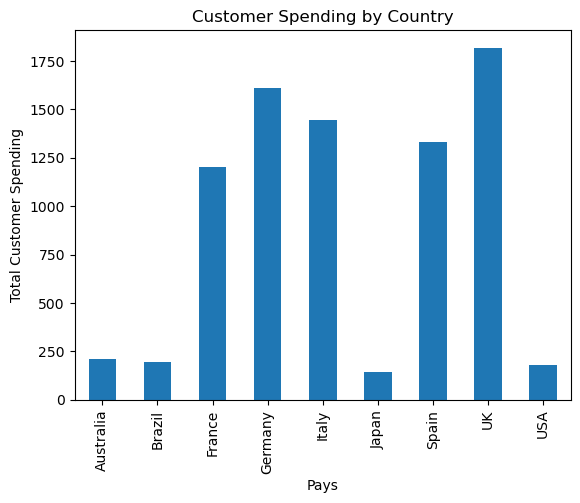

In [3]:
import matplotlib.pyplot as plt

# Technical summar
print('Technical summary')
print('Number of Rows:',data_set.shape[0])
print('Number of Columns:',data_set.shape[1])
print('Data Types:')
print(data_set.dtypes)
print('Medians and means summary')
print("The median age of your costumers is:",median_age)
print("The mean age of your costumers is:",mean_age)
print("The median of costumer spending is:",median_spending)
print("The mean of costumer spending is:",mean_spending)
# Group by country and sum the spending
spending_by_country = data_set.groupby('Pays')['Dépenses_des_clients'].sum()

# Create a bar chart
spending_by_country.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Total Customer Spending')
plt.title('Customer Spending by Country')
plt.show()
# Removing the poor
data_set = data_set[data_set['Dépenses_des_clients'] >= 10]
# Removing the dups
data_set = data_set.drop_duplicates()
# Saving the data set
data_set.to_csv('./output_file.csv', index=False)